In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
%matplotlib inline


def sum_of_square(vec_a, vec_b):
    diff = vec_a - vec_b
    diff_squared = np.square(diff)
    return (np.sum(diff_squared))

df_june = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_june2016.csv")
df_july = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_july2016.csv")
df_aug = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_aug2016.csv")
df_sep = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_sep2016.csv")
df_oct = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_oct2016.csv")
df_nov = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\loc_1\\sampled_each_hour\\WeatherData_loc1_nov2016.csv")



In [163]:
df = pd.concat([df_june,df_july,df_aug,df_sep], axis=0)
df.reset_index(inplace=True)
# df.to_csv("check.csv")

In [164]:
#df

In [165]:
# Adding variables to pandas dataframe
df['y_t_1'] = df.Temperature.shift(-1) # y_(t+1)
df['y_t_2'] = df.Temperature.shift(-2) # y_(t+2)
df['y_t_3'] = df.Temperature.shift(-3) # y_(t+3)
df['y_t_4'] = df.Temperature.shift(-4) # y_(t+4)
df['y_t_5'] = df.Temperature.shift(-5) # y_(t+5)

# Adding past variables of order_1 (o1)

# columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 
#          'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

df['FeelsLike_o1'] = df.FeelsLike.shift(1) # t-1
df['DewPoint_o1'] = df.DewPoint.shift(1) # t-1
df['RelativeHumidity_o1'] = df.RelativeHumidity.shift(1) # t-1
df['WindSpeed_o1'] = df.WindSpeed.shift(1) # t-1
df['WindGust_o1'] = df.WindGust.shift(1) # t-1
df['RainSince9am_o1'] = df.RainSince9am.shift(1) # t-1
df['Pressure_o1'] = df.Pressure.shift(1) # t-1
df['RainfallLastHour_o1'] = df.RainfallLastHour.shift(1) # t-1
df['RainfallLast10Minutes_o1'] = df.RainfallLast10Minutes.shift(1) # t-1



In [166]:
# Drop nans
df = df.dropna()
# df.head(5)
# df.to_csv('July2016_pandas_df_for_visualisation_order1_nans_dropped.csv')

In [167]:
y_gt = df.as_matrix(columns=['Temperature'])

tot_points = y_gt.shape[0]
train_points = 1400
test_points = tot_points - train_points
print(tot_points, train_points, test_points)

2233 1400 833


In [168]:
df_train = df.loc[0:train_points]
df_test = df.loc[train_points + 1:tot_points]
#df.head(6)
# df
# print(linear_model.LinearRegression.__doc__)
# df.keys()

In [170]:
df_test

,index,ObservationId,Timestamp,ParentLocationId,RelatedLocationId,ReadingId,UtcTime,LocalTime,TimeZone,Temperature,...,y_t_5,FeelsLike_o1,DewPoint_o1,RelativeHumidity_o1,WindSpeed_o1,WindGust_o1,RainSince9am_o1,Pressure_o1,RainfallLastHour_o1,RainfallLast10Minutes_o1
1401,599,11830,1472130000,1,94008,4848,8/25/2016 23:00,8/25/2016 23:00,Australia/Hobart,8.8,...,14.5,3.3,2.1,71.0,22.0,32.0,0.8,1013.0,0.0,0.0
1402,600,11831,1472133600,1,94008,4855,8/26/2016 0:00,8/26/2016 0:00,Australia/Hobart,11.1,...,14.5,6.5,3.5,69.0,15.0,24.0,0.8,1013.0,0.0,0.0
1403,601,11832,1472137200,1,94008,4858,8/26/2016 1:00,8/26/2016 1:00,Australia/Hobart,12.6,...,13.9,8.4,2.5,55.0,24.0,35.0,0.0,1013.0,0.0,0.0
1404,602,11833,1472140800,1,94008,4863,8/26/2016 2:00,8/26/2016 2:00,Australia/Hobart,13.6,...,12.8,10.3,2.8,51.0,24.0,33.0,0.0,1012.0,0.0,0.0
1405,603,11834,1472144400,1,94008,4868,8/26/2016 3:00,8/26/2016 3:00,Australia/Hobart,13.9,...,11.4,11.2,3.1,49.0,32.0,41.0,0.0,1012.0,0.0,0.0
1406,604,11835,1472148000,1,94008,4872,8/26/2016 4:00,8/26/2016 4:00,Australia/Hobart,14.5,...,11.5,11.3,1.7,43.0,37.0,50.0,0.0,1011.0,0.0,0.0
1407,605,11836,1472151600,1,94008,4877,8/26/2016 5:00,8/26/2016 5:00,Australia/Hobart,14.5,...,11.1,12.3,1.7,42.0,33.0,46.0,0.0,1011.0,0.0,0.0
1408,606,11837,1472155200,1,94008,4881,8/26/2016 6:00,8/26/2016 6:00,Australia/Hobart,13.9,...,10.8,12.4,2.0,43.0,32.0,46.0,0.2,1011.0,0.2,0.2
1409,607,11838,1472158800,1,94008,4885,8/26/2016 7:00,8/26/2016 7:00,Australia/Hobart,12.8,...,10.6,11.7,2.9,47.0,30.0,43.0,0.2,1011.0,0.0,0.0
1410,608,11839,1472162400,1,94008,4889,8/26/2016 8:00,8/26/2016 8:00,Australia/Hobart,11.4,...,10.3,10.9,3.1,52.0,20.0,30.0,0.2,1012.0,0.0,0.0


In [171]:
# df.to_csv('July2016_pandas_df.csv')

In [172]:
print(y_gt.shape)

(2233, 1)


In [173]:
# Dropping variables that are not used for training
df = df.drop('index',axis=1)
df = df.drop('ObservationId',axis=1)
df = df.drop('Timestamp',axis=1)
df = df.drop('ParentLocationId',axis=1)
df = df.drop('RelatedLocationId',axis=1)
df = df.drop('ReadingId',axis=1)
df = df.drop('UtcTime',axis=1)
df = df.drop('LocalTime',axis=1)
df = df.drop('TimeZone',axis=1)
df = df.drop('WindDirection',axis=1)
df = df.drop('WindDirectionCompass',axis=1)

In [174]:
df.columns

Index(['Temperature', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed',
       'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour',
       'RainfallLast10Minutes', 'y_t_1', 'y_t_2', 'y_t_3', 'y_t_4', 'y_t_5',
       'FeelsLike_o1', 'DewPoint_o1', 'RelativeHumidity_o1', 'WindSpeed_o1',
       'WindGust_o1', 'RainSince9am_o1', 'Pressure_o1', 'RainfallLastHour_o1',
       'RainfallLast10Minutes_o1'],
      dtype='object')

In [175]:
# x = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

# x_t1 = df.as_matrix(columns=['time_index', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'Pressure'])
# x_t1 = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])
# x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])
# x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes')
x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes', 'FeelsLike_o1', 'DewPoint_o1', 'RelativeHumidity_o1','WindSpeed_o1', 'WindGust_o1', 'RainSince9am_o1', 'Pressure_o1','RainfallLastHour_o1', 'RainfallLast10Minutes_o1'])


# Do scaling according to min-max scaling
scaler_minmax = preprocessing.MinMaxScaler()
x_t1 = scaler_minmax.fit_transform(x_t1)

# Add polynomials
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_t1 = poly.fit_transform(x_t1)

# get the vectors for five-hour forecast
y_gt_t1 = df.as_matrix(columns=[df.y_t_1.name])
y_gt_t2 = df.as_matrix(columns=[df.y_t_2.name])
y_gt_t3 = df.as_matrix(columns=[df.y_t_3.name])
y_gt_t4 = df.as_matrix(columns=[df.y_t_4.name])
y_gt_t5 = df.as_matrix(columns=[df.y_t_5.name])

print(x_t1.shape)
print(y_gt_t1.shape)
print(y_gt_t2.shape)
print(y_gt_t3.shape)
print(y_gt_t4.shape)
print(y_gt_t5.shape)

(2233, 172)
(2233, 1)
(2233, 1)
(2233, 1)
(2233, 1)
(2233, 1)


In [176]:
# x_t1[743:744,:]
# y_gt_t1[0:744,:]
# print(y_gt_t1.shape[0],y_gt_t1.shape[1])
print(x_t1[1:2,:])

[[ 1.          0.54771785  0.60795454  0.50724638  0.17105263  0.19230769
   0.          0.6779661   0.          0.          0.55186723  0.5965909
   0.46376812  0.23684211  0.26923077  0.          0.6779661   0.          0.
   0.33298755  0.2778279   0.09368858  0.10533036  0.          0.37133414
   0.          0.          0.30226753  0.32676349  0.25401408  0.12972265
   0.1474625   0.          0.37133414  0.          0.          0.30838274
   0.10399222  0.11691433  0.          0.41217257  0.          0.
   0.33551019  0.36270015  0.28194993  0.14398923  0.16368007  0.
   0.41217257  0.          0.          0.08676583  0.09754738  0.
   0.34389585  0.          0.          0.27993265  0.30261857  0.2352447
   0.1201373   0.13656633  0.          0.34389585  0.          0.
   0.03289474  0.          0.11596789  0.          0.          0.09439834
   0.10204844  0.07932876  0.04051247  0.04605263  0.          0.11596789
   0.          0.          0.          0.1303781   0.          0.
  

In [177]:
# Generate Train Sequence
x_t1_train = x_t1[0:train_points + 1,:]
y_gt_t1_train = y_gt_t1[0:train_points + 1,:]
y_gt_t2_train = y_gt_t2[0:train_points + 1,:]
y_gt_t3_train = y_gt_t3[0:train_points + 1,:]
y_gt_t4_train = y_gt_t4[0:train_points + 1,:]
y_gt_t5_train = y_gt_t5[0:train_points + 1,:]




# Generate Test Sequence
x_t1_test = x_t1[train_points:tot_points + 1 ,:]
y_t1_test = y_gt_t1[train_points:tot_points + 1,:]
y_t2_test = y_gt_t2[train_points:tot_points + 1,:]
y_t3_test = y_gt_t3[train_points:tot_points + 1,:]
y_t4_test = y_gt_t4[train_points:tot_points + 1,:]
y_t5_test = y_gt_t5[train_points:tot_points + 1,:]


print(x_t1_train.shape, y_gt_t1_train.shape, y_gt_t2_train.shape, y_gt_t3_train.shape, y_gt_t4_train.shape, y_gt_t5_train.shape)
print(x_t1_test.shape, y_t1_test.shape, y_t2_test.shape, y_t3_test.shape, y_t4_test.shape, y_t5_test.shape)

(1401, 172) (1401, 1) (1401, 1) (1401, 1) (1401, 1) (1401, 1)
(833, 172) (833, 1) (833, 1) (833, 1) (833, 1) (833, 1)


In [178]:
# print(y_gt_t4_train[0:5,:])
# print(x_t1_test[0])
# print(y_t5_test)

In [179]:
# call linear regression for five forecasts
obj_1 = linear_model.LinearRegression()
obj_1.fit(x_t1_train,y_gt_t1_train)

obj_2 = linear_model.LinearRegression()
obj_2.fit(x_t1_train,y_gt_t2_train)

obj_3 = linear_model.LinearRegression()
obj_3.fit(x_t1_train,y_gt_t3_train)

obj_4 = linear_model.LinearRegression()
obj_4.fit(x_t1_train,y_gt_t4_train)

obj_5 = linear_model.LinearRegression()
obj_5.fit(x_t1_train,y_gt_t5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [180]:
# regression_object.predict(x)[0:5] predict first five data vectors
test_ind = 0;
ybar_1 = obj_1.predict(x_t1_test)[test_ind]
ybar_2 = obj_2.predict(x_t1_test)[test_ind]
ybar_3 = obj_3.predict(x_t1_test)[test_ind]
ybar_4 = obj_4.predict(x_t1_test)[test_ind]
ybar_5 = obj_5.predict(x_t1_test)[test_ind]
print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

# get groundtruth vector
y_gt_vec = np.empty(5)
y_gt_vec[0] = y_t1_test[test_ind]
y_gt_vec[1] = y_t2_test[test_ind]
y_gt_vec[2] = y_t3_test[test_ind]
y_gt_vec[3] = y_t4_test[test_ind]
y_gt_vec[4] = y_t5_test[test_ind]
print(y_gt_vec)

# get prediction vector
y_pred_vec = np.empty(5)
y_pred_vec[0] = ybar_1
y_pred_vec[1] = ybar_2
y_pred_vec[2] = ybar_3
y_pred_vec[3] = ybar_4
y_pred_vec[4] = ybar_5

# print(y_pred_vec)

# print('from function = \n' sum_of_square(y_pred_vec, y_gt_vec))
sse = sum_of_square(y_pred_vec, y_gt_vec)
print('from function, sse = %f\n' %(sse) )

[ 10.24598129] [ 12.05509948] [ 13.06034178] [ 13.48865697] [ 13.82147305]
[ 11.1  12.6  13.6  13.9  14.5]
from function, sse = 1.947097



In [181]:
print(test_points)
sse_list=[]
for test_instance in range(0,test_points):
    test_ind = test_instance
    ybar_1 = obj_1.predict(x_t1_test)[test_ind]
    ybar_2 = obj_2.predict(x_t1_test)[test_ind]
    ybar_3 = obj_3.predict(x_t1_test)[test_ind]
    ybar_4 = obj_4.predict(x_t1_test)[test_ind]
    ybar_5 = obj_5.predict(x_t1_test)[test_ind]
    # print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

    # get groundtruth vector
    y_gt_vec = np.empty(5)
    y_gt_vec[0] = y_t1_test[test_ind]
    y_gt_vec[1] = y_t2_test[test_ind]
    y_gt_vec[2] = y_t3_test[test_ind]
    y_gt_vec[3] = y_t4_test[test_ind]
    y_gt_vec[4] = y_t5_test[test_ind]
    # print(y_gt_vec)

    # get prediction vector
    y_pred_vec = np.empty(5)
    y_pred_vec[0] = ybar_1
    y_pred_vec[1] = ybar_2
    y_pred_vec[2] = ybar_3
    y_pred_vec[3] = ybar_4
    y_pred_vec[4] = ybar_5

    # print(y_pred_vec)

    # print('from function = \n' sum_of_square(y_pred_vec, y_gt_vec))
    sse = sum_of_square(y_pred_vec, y_gt_vec)
    sse_list.append(sse)
    # print('from function, sse = %f\n' %(sse) )
    

833


In [182]:
sum(sse_list)

51481.530591191498

In [68]:
# all_data = np.append(x_reshaped,col,1)
# diff_vec = y_gt_vec - y_pred_vec
# val_squared = np.square(diff_vec)
# sse = np.sum(val_squared)
# print(diff_vec)
# print(val_squared)
# print('Sum of squared deviations = %f\n' % (sse))


In [69]:
# all_data.shape


In [70]:
# regression_object.fit(all_data,y)

In [71]:
# all_data
# find Nan in array
# nan_indices = np.argwhere(np.isnan(y_t1_test))
# nan_indices

In [72]:
# y_play = y_t1_test
# y_play

In [73]:
# print(regression_object.intercept_)
# print(regression_object.coef_)

In [74]:
# regression_object.predict(x)[0:5] predict first five data vectors
# pred_y = regression_object.predict(x_t1_test)[0:5]

In [75]:
# print(pred_y.shape)

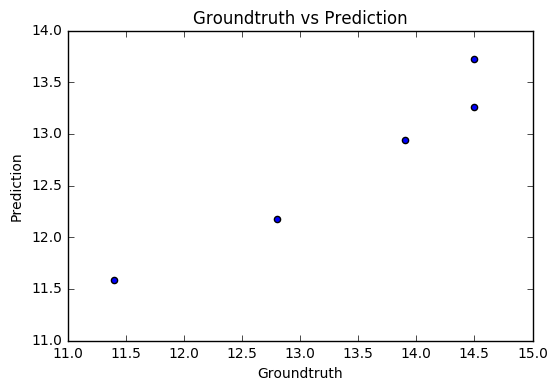

In [80]:
plt.scatter(y_gt_vec,y_pred_vec)
plt.xlabel('Groundtruth')
plt.ylabel('Prediction')
plt.title('Groundtruth vs Prediction')

In [77]:
# print(regression_object.predict(x)[105:109])
# print(regression_object.coef_)
# print(x[0:1,:].shape)

In [78]:
# use y_predict = coeffs*X + intercept for prediction and see if you have gotten their format

# obs = 105; # 1st observation
# data_vector = x[obs:obs+1,:] # Rank-2 view of data_vector
# intercept = regression_object.intercept_
# coeffs = regression_object.coef_
# print(data_vector.shape, coeffs.shape)
# print(data_vector, coeffs)
# print(np.dot(data_vector[0],coeffs[0]))

# Handling numpy arrays
# coeffs_1Darray = coeffs[0]
# data_vector_1Darray = data_vector[0]

# y_predict = (np.dot(coeffs_1Darray,data_vector_1Darray)) + intercept
# print('prediction = %f\n' %y_predict)

In [79]:
# Printing the first column of data matrix, which is time
# x[:,0:1]
# pred_y 

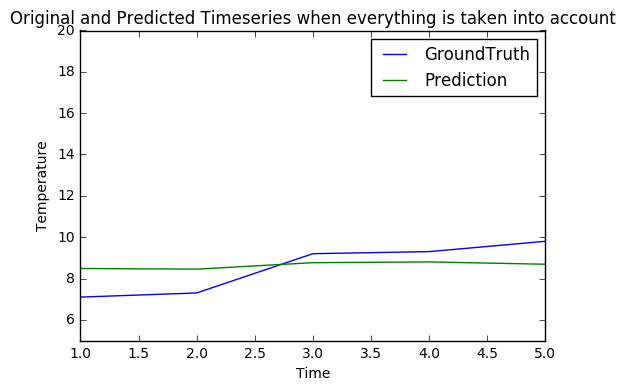

In [183]:
# time_index = x_t1_test[test_ind:test_ind + 5, 0:1];
time_index = np.arange(1,6,1)
# print(time_ind)
plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.ylim(ymin=5)
plt.ylim(ymax=20)
plt.legend()
plt.title('Original and Predicted Timeseries when everything is taken into account')

In [188]:
df_test
# print(time_index)
# print(y_gt_vec)
# print(y_pred_vec)

,index,ObservationId,Timestamp,ParentLocationId,RelatedLocationId,ReadingId,UtcTime,LocalTime,TimeZone,Temperature,...,y_t_5,FeelsLike_o1,DewPoint_o1,RelativeHumidity_o1,WindSpeed_o1,WindGust_o1,RainSince9am_o1,Pressure_o1,RainfallLastHour_o1,RainfallLast10Minutes_o1
1401,599,11830,1472130000,1,94008,4848,8/25/2016 23:00,8/25/2016 23:00,Australia/Hobart,8.8,...,14.5,3.3,2.1,71.0,22.0,32.0,0.8,1013.0,0.0,0.0
1402,600,11831,1472133600,1,94008,4855,8/26/2016 0:00,8/26/2016 0:00,Australia/Hobart,11.1,...,14.5,6.5,3.5,69.0,15.0,24.0,0.8,1013.0,0.0,0.0
1403,601,11832,1472137200,1,94008,4858,8/26/2016 1:00,8/26/2016 1:00,Australia/Hobart,12.6,...,13.9,8.4,2.5,55.0,24.0,35.0,0.0,1013.0,0.0,0.0
1404,602,11833,1472140800,1,94008,4863,8/26/2016 2:00,8/26/2016 2:00,Australia/Hobart,13.6,...,12.8,10.3,2.8,51.0,24.0,33.0,0.0,1012.0,0.0,0.0
1405,603,11834,1472144400,1,94008,4868,8/26/2016 3:00,8/26/2016 3:00,Australia/Hobart,13.9,...,11.4,11.2,3.1,49.0,32.0,41.0,0.0,1012.0,0.0,0.0
1406,604,11835,1472148000,1,94008,4872,8/26/2016 4:00,8/26/2016 4:00,Australia/Hobart,14.5,...,11.5,11.3,1.7,43.0,37.0,50.0,0.0,1011.0,0.0,0.0
1407,605,11836,1472151600,1,94008,4877,8/26/2016 5:00,8/26/2016 5:00,Australia/Hobart,14.5,...,11.1,12.3,1.7,42.0,33.0,46.0,0.0,1011.0,0.0,0.0
1408,606,11837,1472155200,1,94008,4881,8/26/2016 6:00,8/26/2016 6:00,Australia/Hobart,13.9,...,10.8,12.4,2.0,43.0,32.0,46.0,0.2,1011.0,0.2,0.2
1409,607,11838,1472158800,1,94008,4885,8/26/2016 7:00,8/26/2016 7:00,Australia/Hobart,12.8,...,10.6,11.7,2.9,47.0,30.0,43.0,0.2,1011.0,0.0,0.0
1410,608,11839,1472162400,1,94008,4889,8/26/2016 8:00,8/26/2016 8:00,Australia/Hobart,11.4,...,10.3,10.9,3.1,52.0,20.0,30.0,0.2,1012.0,0.0,0.0


In [82]:
# scatter plots of data 
# str_text='RainfallLast10Minutes'
# plt.scatter(y_gt_t1_train,df.as_matrix(columns=[str_text]),color='r')
# plt.xlabel('Temperature')
# plt.ylabel(str_text)

In [83]:
# df.as_matrix(columns=['Temperature'])